In [1]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading all data file

df=pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])
df.head()

Province/State Country/Region      Lat      Long       Date  Confirmed  \
0            NaN       Thailand  15.0000  101.0000 2020-01-22        2.0   
1            NaN          Japan  36.0000  138.0000 2020-01-22        2.0   
2            NaN      Singapore   1.2833  103.8333 2020-01-22        0.0   
3            NaN          Nepal  28.1667   84.2500 2020-01-22        0.0   
4            NaN       Malaysia   2.5000  112.5000 2020-01-22        0.0   

   Deaths  Recovered  
0     0.0        0.0  
1     0.0        0.0  
2     0.0        0.0  
3     0.0        0.0  
4     0.0        0.0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19220 entries, 0 to 19219
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  8432 non-null   object        
 1   Country/Region  19220 non-null  object        
 2   Lat             19220 non-null  float64       
 3   Long            19220 non-null  float64       
 4   Date            19220 non-null  datetime64[ns]
 5   Confirmed       19219 non-null  float64       
 6   Deaths          19219 non-null  float64       
 7   Recovered       19219 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 1.2+ MB


In [4]:
df.describe()

Lat          Long     Confirmed        Deaths     Recovered
count  19220.000000  19220.000000  19219.000000  19219.000000  19219.000000
mean      25.088643      5.289362    287.734586     10.237994    103.066341
std       23.448518     80.081866   3297.651489    155.703574   1795.041235
min      -41.454500   -157.498300      0.000000      0.000000      0.000000
25%       12.518600    -70.162700      0.000000      0.000000      0.000000
50%       31.221000      9.775000      0.000000      0.000000      0.000000
75%       42.165700     57.500000      8.000000      0.000000      0.000000
max       72.000000    178.065000  67800.000000   5476.000000  59879.000000

In [5]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [6]:
#renaming columns
df.rename(columns={'Province/State':'state','Country/Region':'country',
                   'Date':'date','Confirmed':'confirmed','Deaths':'deaths','Recovered':'recovered'},inplace=True)
df.head()

state    country      Lat      Long       date  confirmed  deaths  recovered
0   NaN   Thailand  15.0000  101.0000 2020-01-22        2.0     0.0        0.0
1   NaN      Japan  36.0000  138.0000 2020-01-22        2.0     0.0        0.0
2   NaN  Singapore   1.2833  103.8333 2020-01-22        0.0     0.0        0.0
3   NaN      Nepal  28.1667   84.2500 2020-01-22        0.0     0.0        0.0
4   NaN   Malaysia   2.5000  112.5000 2020-01-22        0.0     0.0        0.0

In [7]:
#Finding out no of active cases

df['active']=df['confirmed']-df['deaths']-df['recovered']
df.head()

state    country      Lat      Long       date  confirmed  deaths  \
0   NaN   Thailand  15.0000  101.0000 2020-01-22        2.0     0.0   
1   NaN      Japan  36.0000  138.0000 2020-01-22        2.0     0.0   
2   NaN  Singapore   1.2833  103.8333 2020-01-22        0.0     0.0   
3   NaN      Nepal  28.1667   84.2500 2020-01-22        0.0     0.0   
4   NaN   Malaysia   2.5000  112.5000 2020-01-22        0.0     0.0   

   recovered  active  
0        0.0     2.0  
1        0.0     2.0  
2        0.0     0.0  
3        0.0     0.0  
4        0.0     0.0

In [8]:
#finding out last date
df['date'].max()

Timestamp('2020-03-23 00:00:00')

In [9]:
#Finding total data country wise
top = df[df['date'] == df['date'].max()]
world=top.groupby(by='country')['confirmed','deaths','recovered','active'].sum().reset_index()
world.head()

country  confirmed  deaths  recovered  active
0  Afghanistan       40.0     1.0        1.0    38.0
1      Albania       89.0     2.0        2.0    85.0
2      Algeria      201.0    17.0       65.0   119.0
3      Andorra      113.0     1.0        1.0   111.0
4       Angola        2.0     0.0        0.0     2.0

In [10]:
world.shape

(183, 5)

In [11]:
#Finding top 20 countries by number of confimed cases
top_20=world.sort_values(by='confirmed',ascending=False).reset_index(drop=True).head(20)

top_20

country  confirmed  deaths  recovered   active
0            China    81439.0  3274.0    72814.0   5351.0
1            Italy    59138.0  5476.0     7024.0  46638.0
2               US    33276.0   417.0      178.0  32681.0
3            Spain    28768.0  1772.0     2575.0  24421.0
4          Germany    24873.0    94.0      266.0  24513.0
5             Iran    21638.0  1685.0     7931.0  12022.0
6           France    16044.0   674.0     2200.0  13170.0
7      South Korea     8897.0   104.0     2909.0   5884.0
8      Switzerland     7245.0    98.0      131.0   7016.0
9   United Kingdom     5741.0   282.0       67.0   5392.0
10     Netherlands     4216.0   180.0        2.0   4034.0
11         Belgium     3401.0    75.0      263.0   3063.0
12         Austria     3244.0    16.0        9.0   3219.0
13          Norway     2383.0     7.0        1.0   2375.0
14          Sweden     1934.0    21.0       16.0   1897.0
15        Portugal     1600.0    14.0        5.0   1581.0
16          Brazil     1593.0    25.0        2.0   1566.0
17         Denmark     1514.0    13.0        1.0   1500.0
18          Canada     1470.0    21.0       10.0   1439.0
19       Australia     1314.0     7.0       88.0   1219.0

In [12]:
#Plotting graph of top 20 countries

fig = px.bar(top_20, y='confirmed', x='country', text_auto='.2s',
            title="Top 20 countries by number of confirmed covid cases")
fig.show()

In [13]:
#Plotting graph of all countries with covid active cases

figure = px.choropleth(world, locations = 'country',
                        locationmode = 'country names', color = 'active',
                        hover_name = 'country', range_color = [1,1000],
                        color_continuous_scale = "blues",
                        title = "Countries with Active Cases")

figure.show()

In [14]:
#Datewise confirmed cases
total_cases = df.groupby('date')['date', 'confirmed'].sum().reset_index()
total_cases.head()

date  confirmed
0 2020-01-22      554.0
1 2020-01-23      652.0
2 2020-01-24      939.0
3 2020-01-25     1432.0
4 2020-01-26     2113.0

In [15]:
total_cases.shape

(62, 2)

In [16]:
#Plotting date wise graph of cases
fig = px.line(total_cases, x='date', y='confirmed',  markers=True,
              title='Worldwide Confirmed cases over time')
fig.show()

In [17]:
#Taking top 20 country names

top_10=top_20['country'].value_counts().keys().tolist()[:10]
print(top_10)

['China', 'Italy', 'Canada', 'Denmark', 'Brazil', 'Portugal', 'Sweden', 'Norway', 'Austria', 'Belgium']


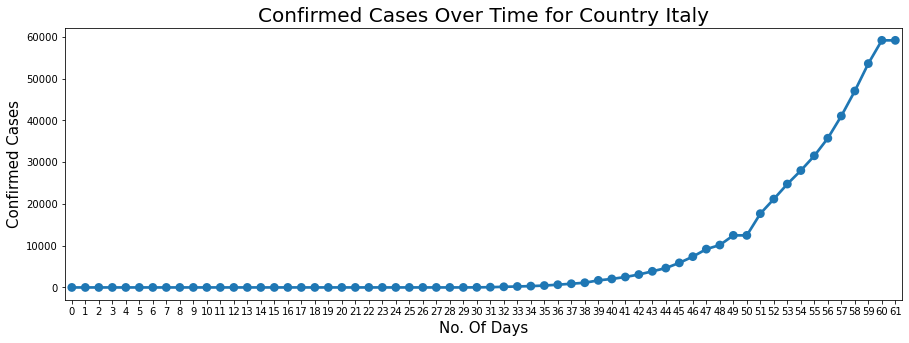

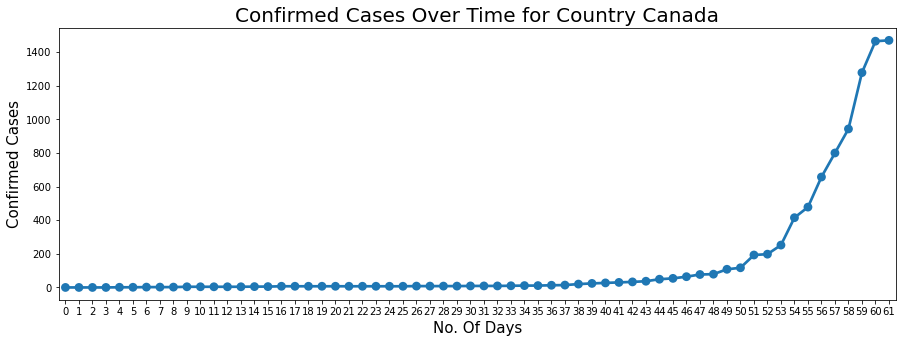

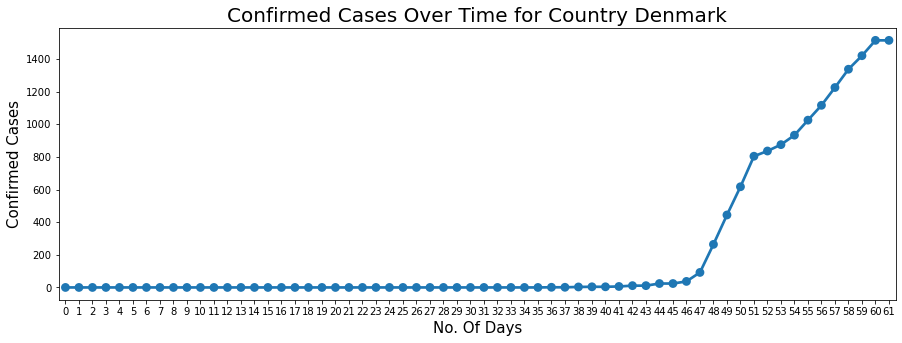

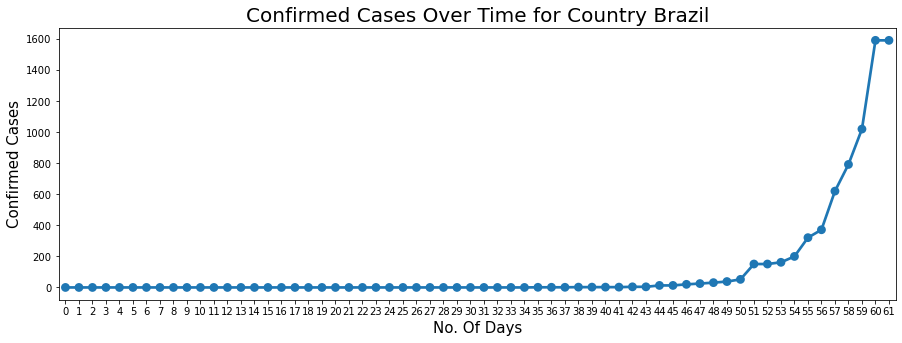

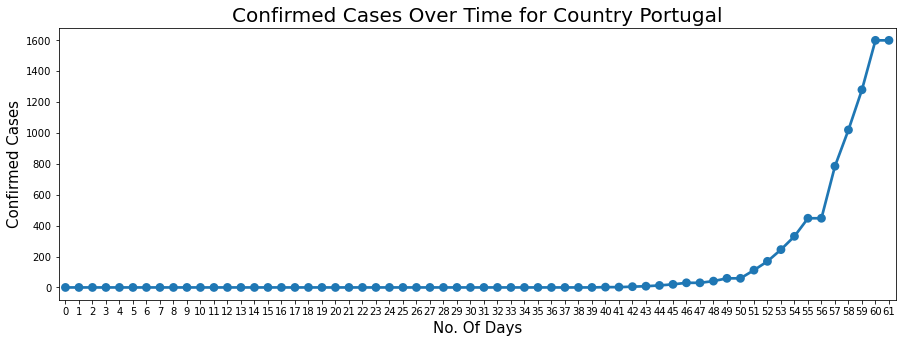

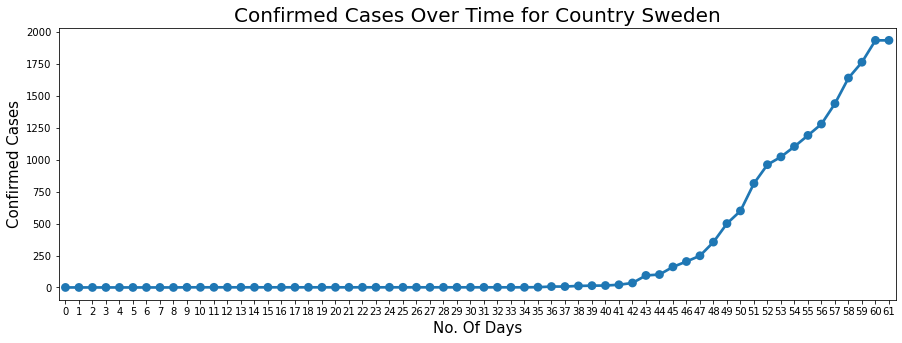

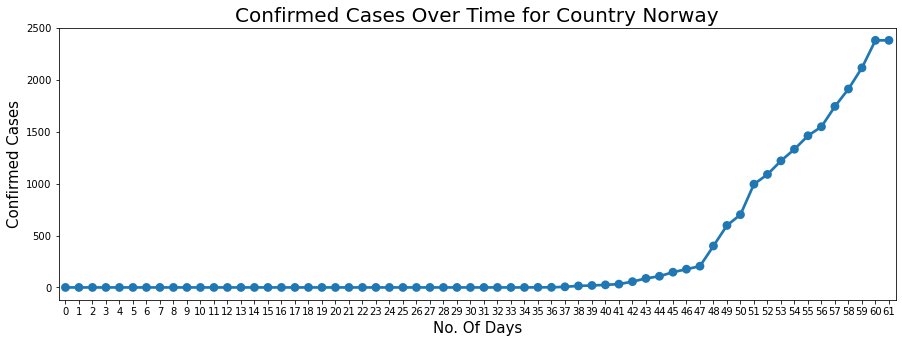

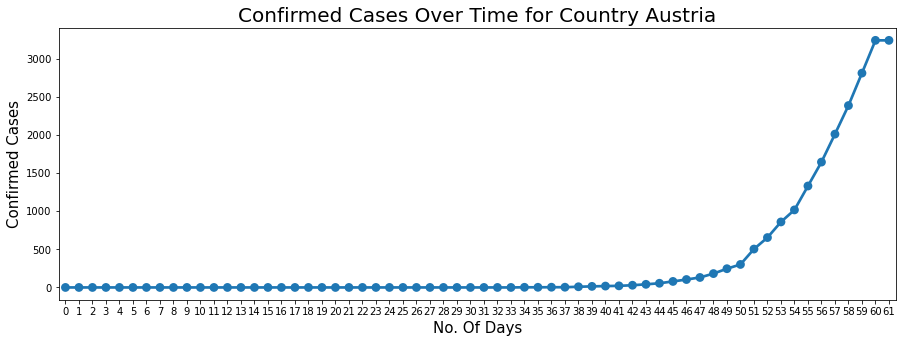

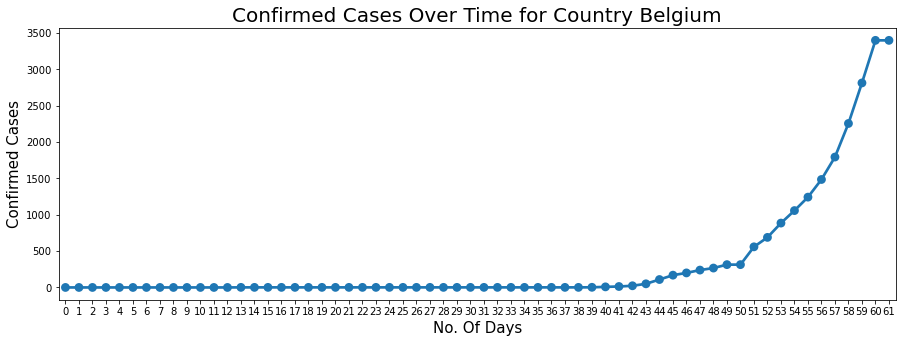

In [18]:
#Plotting top 10 contries confirmed cases over time 
for i in top_10:
    name = df[df.country == i]
    name = name.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index(drop=True)
    plt.figure(figsize=(15,5))
    sns.pointplot(name.index, name.confirmed)
    plt.title('Confirmed Cases Over Time for Country {}'.format(i), fontsize = 20)
    plt.xlabel('No. Of Days', fontsize = 15)
    plt.ylabel('Confirmed Cases', fontsize = 15)
    plt.show()

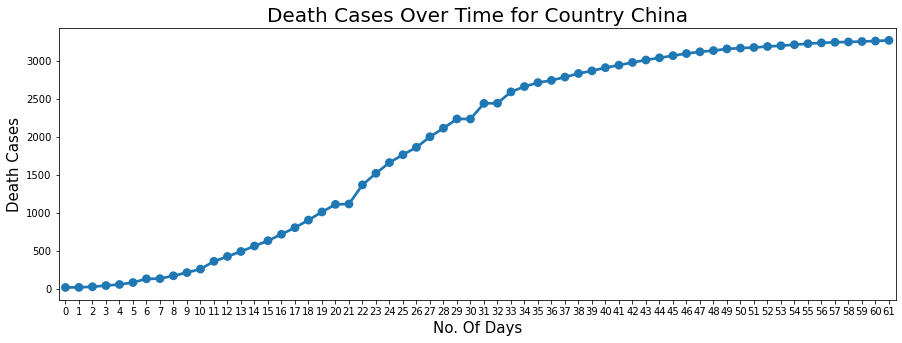

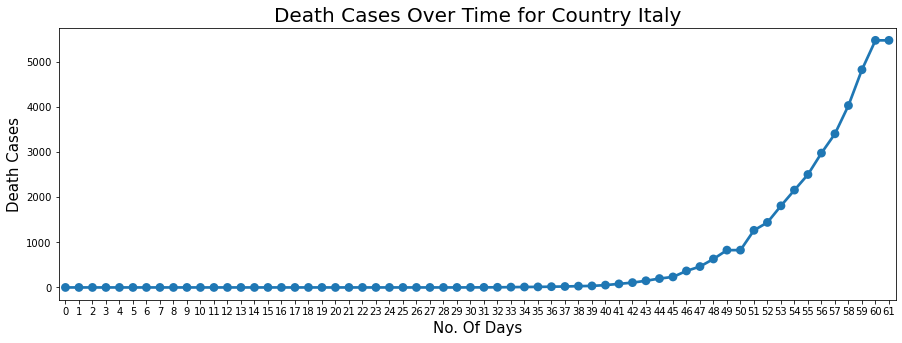

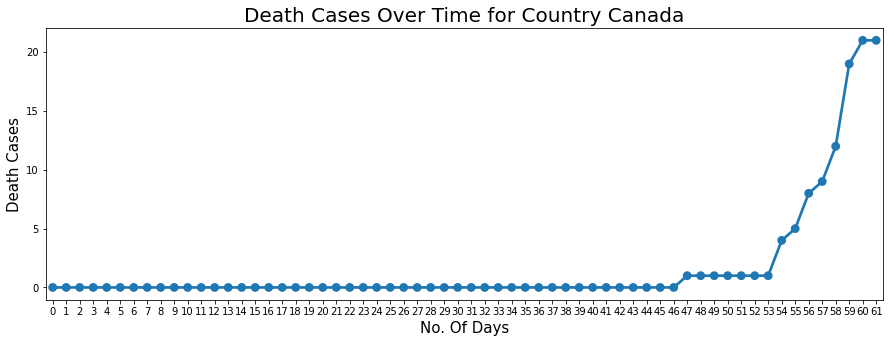

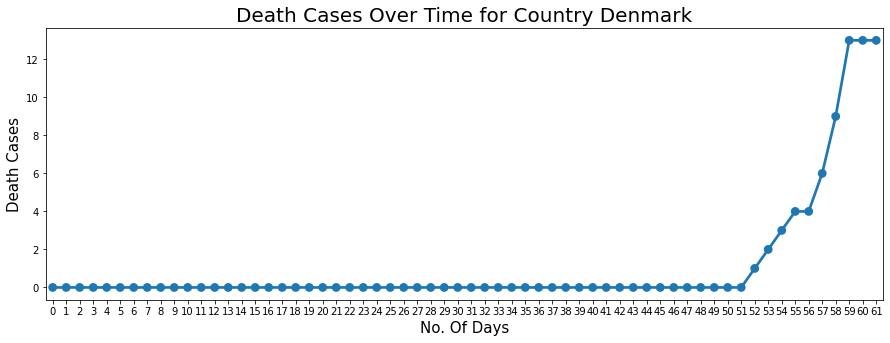

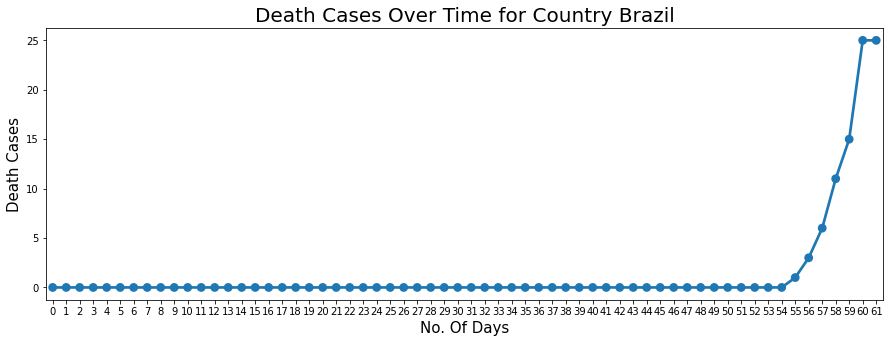

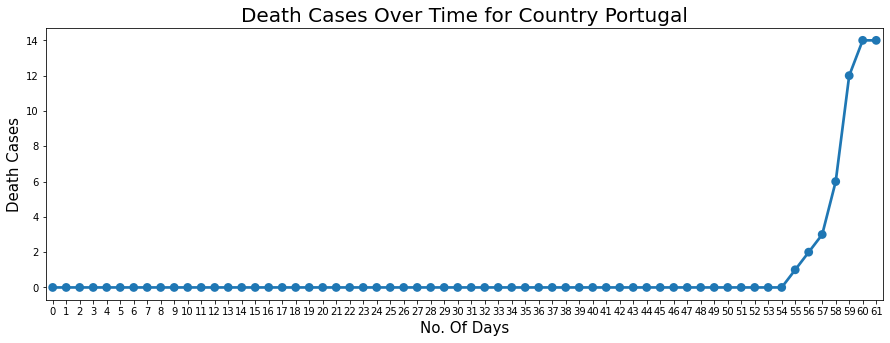

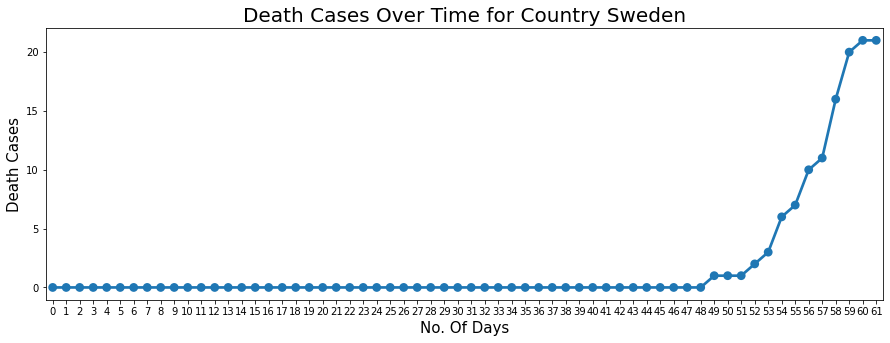

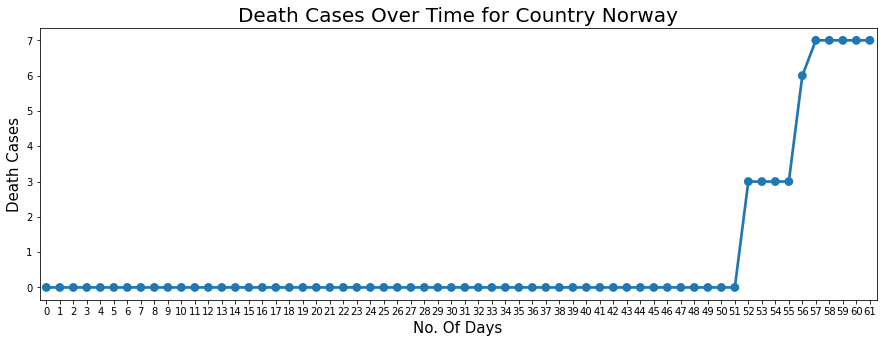

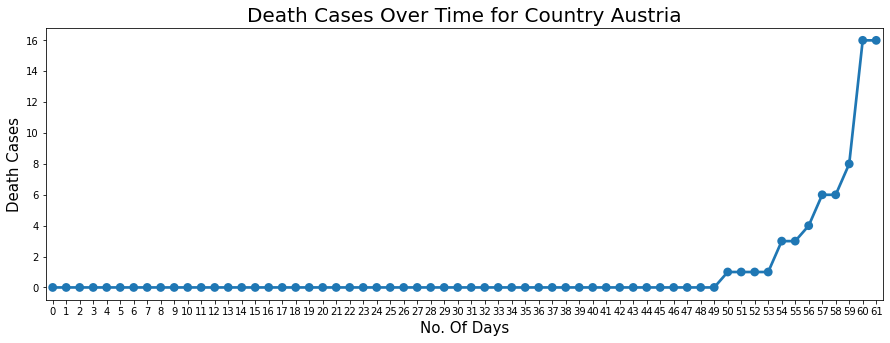

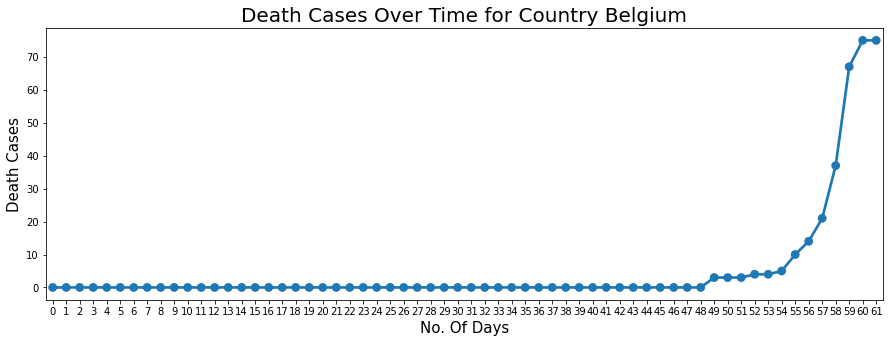

In [19]:
#Plotting top 10 contries death cases over time 
for i in top_10:
    name = df[df.country == i]
    name = name.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
    plt.figure(figsize=(15,5))
    sns.pointplot(name.index, name.deaths)
    plt.title('Death Cases Over Time for Country {}'.format(i), fontsize = 20)
    plt.xlabel('No. Of Days', fontsize = 15)
    plt.ylabel('Death Cases', fontsize = 15)
    plt.show()

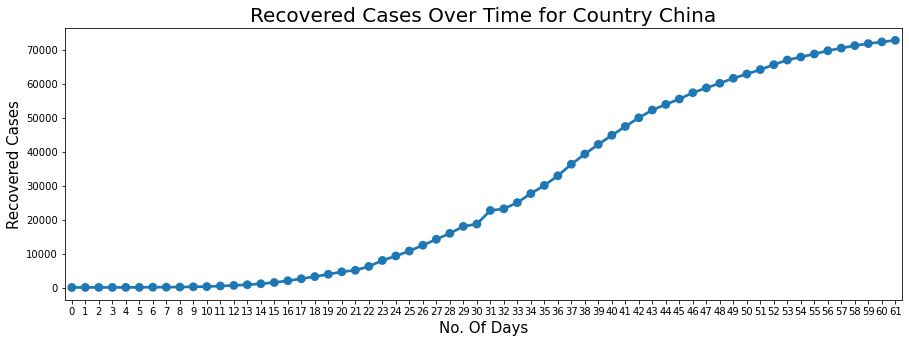

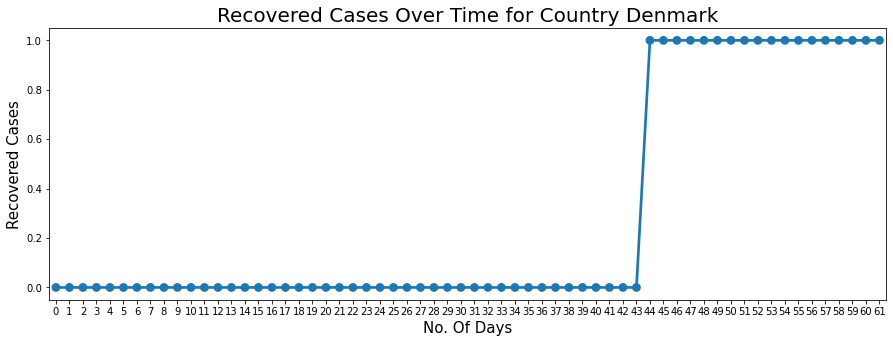

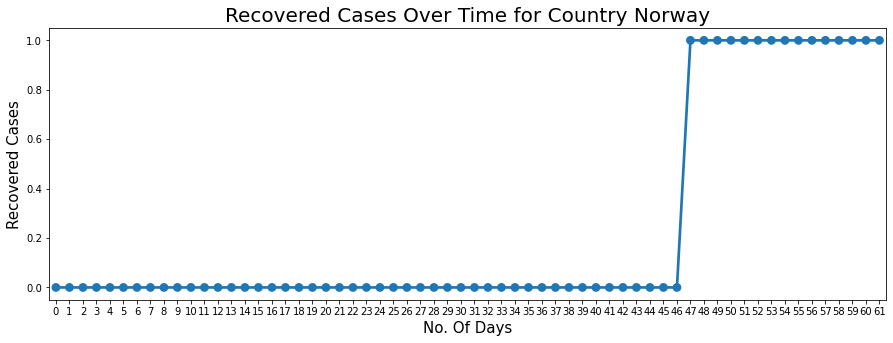

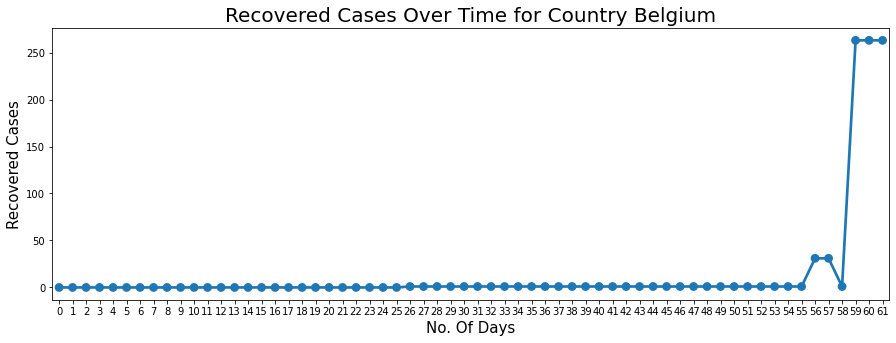

In [20]:
#Plotting top 10 contries recovered cases over time 
for i in top_10:
    name = df[df.country == i]
    name = name.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
    plt.figure(figsize=(15,5))
    sns.pointplot(name.index, name.recovered)
    plt.title('Recovered Cases Over Time for Country {}'.format(i), fontsize = 20)
    plt.xlabel('No. Of Days', fontsize = 15)
    plt.ylabel('Recovered Cases', fontsize = 15)
    plt.show()

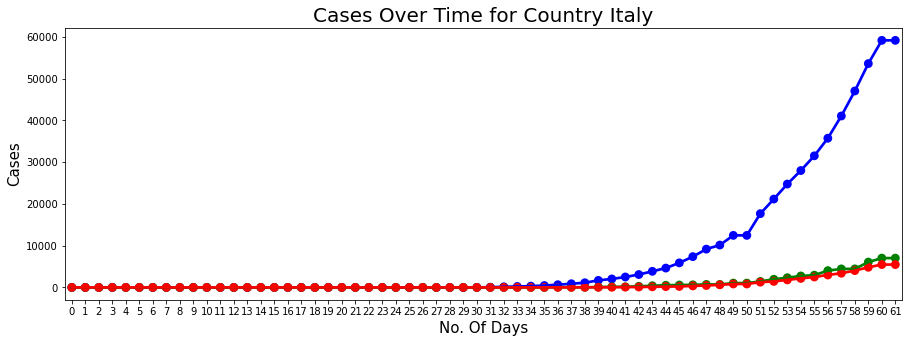

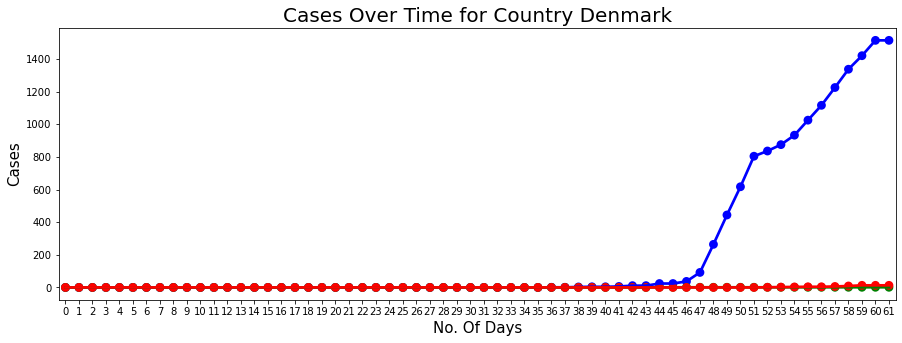

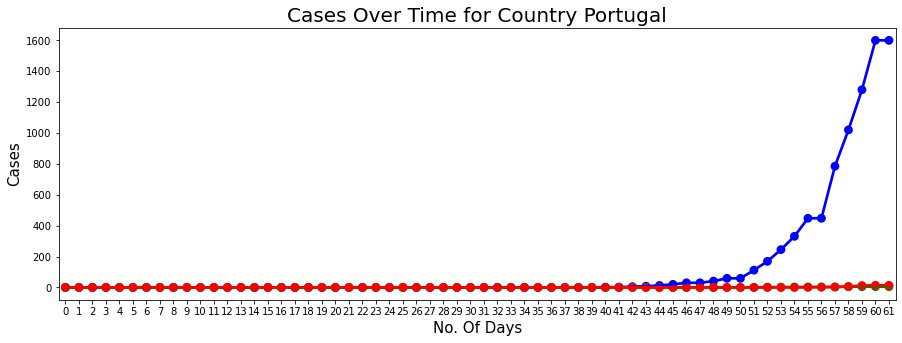

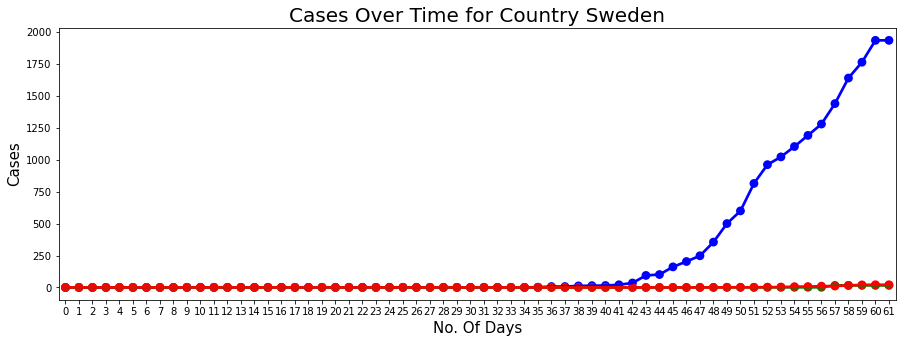

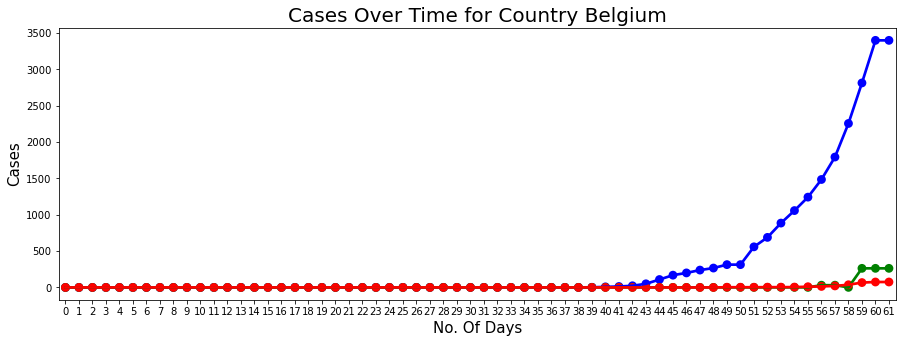

In [21]:
#Plotting top 10 contries cases over time 
for i in top_10:
    name = df[df.country == i]
    name = name.groupby(by = 'date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
    plt.figure(figsize=(15,5))
    sns.pointplot(name.index, name.confirmed, color='blue')
    sns.pointplot(name.index, name.recovered,color='green')
    sns.pointplot(name.index, name.deaths,color='red')
    plt.title('Cases Over Time for Country {}'.format(i), fontsize = 20)
    plt.xlabel('No. Of Days', fontsize = 15)
    plt.ylabel('Cases', fontsize = 15)
    plt.show()

In [22]:
#Top 20 countries contribution in covid cases 
fig = px.pie(top_20, values='confirmed', names='country')
fig.show()

In [23]:
# Detailed Analysis of COVID Cases in India

In [24]:
#Importing files

df_india=pd.read_excel('covid_19_india.xlsx')
df_india.head()

S. No. Name of State / UT  Total Confirmed cases (Indian National)  \
0       1     Andhra Pradesh                                        9   
1       2              Bihar                                        3   
2       3       Chhattisgarh                                        1   
3       4              Delhi                                       30   
4       5            Gujarat                                       32   

   Total Confirmed cases ( Foreign National )  Cured  Death  
0                                           0      0      0  
1                                           0      0      1  
2                                           0      0      0  
3                                           1      6      1  
4                                           1      0      1

In [25]:
#Checking shape of file
df_india.shape

(25, 6)

In [26]:
df_india['Total Cases'] = df_india['Total Confirmed cases (Indian National)'] + df_india['Total Confirmed cases ( Foreign National )']

In [27]:
df_india.set_index('S. No.',inplace=True)

In [28]:
df_india

Name of State / UT  Total Confirmed cases (Indian National)  \
S. No.                                                               
1          Andhra Pradesh                                        9   
2                   Bihar                                        3   
3            Chhattisgarh                                        1   
4                   Delhi                                       30   
5                 Gujarat                                       32   
6                 Haryana                                       14   
7        Himachal Pradesh                                        3   
8               Karnataka                                       41   
9                  Kerala                                      101   
10         Madhya Pradesh                                        9   
11            Maharashtra                                       98   
12                Manipur                                        1   
13                Mizoram                                        1   
14                 Odisha                                        2   
15             Puducherry                                        1   
16                 Punjab                                       29   
17              Rajasthan                                       30   
18             Tamil Nadu                                       16   
19              Telengana                                       25   
20             Chandigarh                                        7   
21      Jammu and Kashmir                                        7   
22                 Ladakh                                       13   
23          Uttar Pradesh                                       34   
24            Uttarakhand                                        3   
25            West Bengal                                        9   

        Total Confirmed cases ( Foreign National )  Cured  Death  Total Cases  
S. No.                                                                         
1                                                0      0      0            9  
2                                                0      0      1            3  
3                                                0      0      0            1  
4                                                1      6      1           31  
5                                                1      0      1           33  
6                                               14     11      0           28  
7                                                0      0      1            3  
8                                                0      3      1           41  
9                                                8      4      0          109  
10                                               0      0      0            9  
11                                               3      0      2          101  
12                                               0      0      0            1  
13                                               0      0      0            1  
14                                               0      0      0            2  
15                                               0      0      0            1  
16                                               0      0      1           29  
17                                               2      3      0           32  
18                                               2      1      0           18  
19                                              10      1      0           35  
20                                               0      0      0            7  
21                                               0      1      0            7  
22                                               0      0      0           13  
23                                               1     11      0           35  
24                                               1      0      0            4  
25                                  

In [29]:
#Finding total active cases
df_india['Total Active'] = df_india['Total Cases'] - (df_india['Death'] + df_india['Cured'])

In [30]:
total_active = df_india['Total Active'].sum()
print(total_active)

512


In [31]:
#Finding highest to lowest cases
df_india[['Name of State / UT','Total Cases','Total Active']].sort_values(by='Total Active',ascending=False).reset_index(drop=True)

Name of State / UT  Total Cases  Total Active
0              Kerala          109           105
1         Maharashtra          101            99
2           Karnataka           41            37
3           Telengana           35            34
4             Gujarat           33            32
5           Rajasthan           32            29
6              Punjab           29            28
7       Uttar Pradesh           35            24
8               Delhi           31            24
9             Haryana           28            17
10         Tamil Nadu           18            17
11             Ladakh           13            13
12     Andhra Pradesh            9             9
13     Madhya Pradesh            9             9
14        West Bengal            9             8
15         Chandigarh            7             7
16  Jammu and Kashmir            7             6
17        Uttarakhand            4             4
18             Odisha            2             2
19              Bihar            3             2
20   Himachal Pradesh            3             2
21         Puducherry            1             1
22            Manipur            1             1
23       Chhattisgarh            1             1
24            Mizoram            1             1

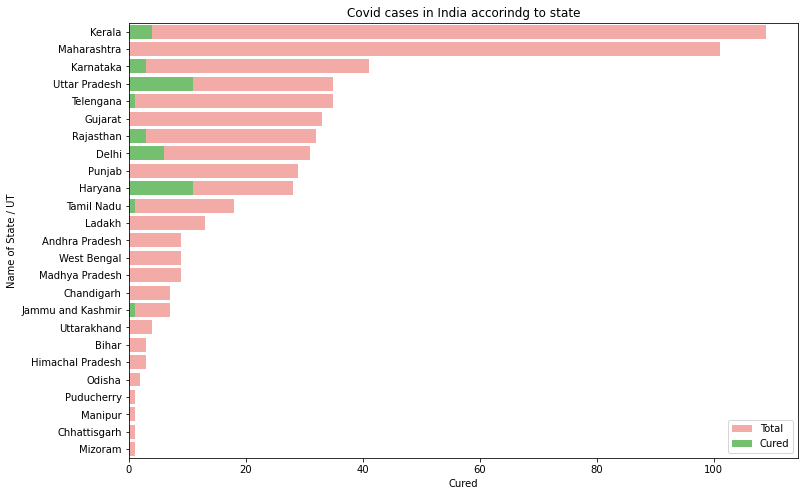

In [32]:
plt.figure(figsize=(12,8))
data = df_india[['Name of State / UT','Total Cases','Cured','Death']]
data.sort_values('Total Cases', ascending=False, inplace = True)
sns.set_color_codes("pastel")
sns.barplot(x="Total Cases", y="Name of State / UT", data=data, label="Total", color ="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color ="g")
plt.title('Covid cases in India accorindg to state')
plt.legend(loc='best')
plt.show()


In [33]:
per_day_india = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name='India')
per_day_india.head()

Date  Total Cases  New Cases  Days after surpassing 100 cases
0 2020-01-30            1          1                              NaN
1 2020-01-31            1          0                              NaN
2 2020-02-01            1          0                              NaN
3 2020-02-02            2          1                              NaN
4 2020-02-03            3          1                              NaN

In [34]:
#Per day cases in india
fig = px.line(per_day_india, x='Date', y="Total Cases",title='Covid cases trend in India',markers=True)
fig.show()

In [35]:

# Insights into COVID cases globally

In [36]:
df_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
df_recovered = pd.read_csv('time_series_covid19_recovered_global.csv')
df_deaths = pd.read_csv('time_series_covid19_deaths_global.csv')

df_confirmed.rename(columns = {'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns = {'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns = {'Country/Region':'Country'}, inplace=True)

In [37]:
df_confirmed.head()

Province/State      Country      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN  Afghanistan  33.0000  65.0000        0        0        0   
1            NaN      Albania  41.1533  20.1683        0        0        0   
2            NaN      Algeria  28.0339   1.6596        0        0        0   
3            NaN      Andorra  42.5063   1.5218        0        0        0   
4            NaN       Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/15/20  3/16/20  3/17/20  3/18/20  \
0        0        0        0  ...       16       21       22       22   
1        0        0        0  ...       42       51       55       59   
2        0        0        0  ...       48       54       60       74   
3        0        0        0  ...        1        2       39       39   
4        0        0        0  ...        0        0        0        0   

   3/19/20  3/20/20  3/21/20  3/22/20  3/23/20  3/24/20  
0       22       24       24       40       40       74  
1       64       70       76       89      104      123  
2       87       90      139      201      230      264  
3       53       75       88      113      133      164  
4        0        1        2        2        3        3  

[5 rows x 67 columns]

In [38]:
df_recovered.head()

Province/State    Country      Lat      Long  1/22/20  1/23/20  1/24/20  \
0            NaN   Thailand  15.0000  101.0000        0        0        0   
1            NaN      Japan  36.0000  138.0000        0        0        0   
2            NaN  Singapore   1.2833  103.8333        0        0        0   
3            NaN      Nepal  28.1667   84.2500        0        0        0   
4            NaN   Malaysia   2.5000  112.5000        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/14/20  3/15/20  3/16/20  3/17/20  \
0        0        2        2  ...       35       35       35       41   
1        0        1        1  ...      118      118      144      144   
2        0        0        0  ...      105      105      109      114   
3        0        0        0  ...        1        1        1        1   
4        0        0        0  ...       35       42       42       49   

   3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  3/23/20  
0       42       42       42       42       44     44.0  
1      144      150      191      232      235    235.0  
2      114      114      124      140      144    144.0  
3        1        1        1        1        1      1.0  
4       60       75       87      114      139    139.0  

[5 rows x 66 columns]

In [39]:
df_deaths.head()

Province/State      Country       Lat       Long  1/22/20  1/23/20  1/24/20  \
0            NaN  Afghanistan  33.93911  67.709953        0        0        0   
1            NaN      Albania  41.15330  20.168300        0        0        0   
2            NaN      Algeria  28.03390   1.659600        0        0        0   
3            NaN      Andorra  42.50630   1.521800        0        0        0   
4            NaN       Angola -11.20270  17.873900        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  12/3/22  12/4/22  12/5/22  12/6/22  \
0        0        0        0  ...     7834     7834     7835     7835   
1        0        0        0  ...     3594     3594     3594     3594   
2        0        0        0  ...     6881     6881     6881     6881   
3        0        0        0  ...      157      157      157      157   
4        0        0        0  ...     1924     1924     1925     1925   

   12/7/22  12/8/22  12/9/22  12/10/22  12/11/22  12/12/22  
0     7837     7839     7839      7839      7839      7840  
1     3594     3594     3594      3594      3594      3594  
2     6881     6881     6881      6881      6881      6881  
3      158      158      158       158       158       158  
4     1925     1925     1925      1925      1925      1925  

[5 rows x 1060 columns]

In [40]:
confirmed = df.groupby('date').sum()['confirmed'].reset_index()
deaths = df.groupby('date').sum()['deaths'].reset_index()
recovered = df.groupby('date').sum()['recovered'].reset_index()

In [41]:
df_india_cases = df.query('country == "India"').groupby("date")[['confirmed', 'deaths', 'recovered']].sum().reset_index()
india_confirmed, india_deaths, india_recovered = df_india_cases[['date', 'confirmed']], df_india_cases[['date', 'deaths']], df_india_cases[['date', 'recovered']]

In [42]:
#Plotting world wide covid cases

fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['date'], y=confirmed['confirmed'], mode='lines+markers', name='confirmed', line = dict(color = 'blue')))
fig.add_trace(go.Scatter(x=deaths['date'], y=deaths['deaths'], mode='lines+markers', name='deaths', line = dict(color = 'red')))
fig.add_trace(go.Scatter(x=recovered['date'], y=recovered['recovered'], mode='lines+markers', name='recovered', line = dict(color = 'green')))
fig.update_layout(title_text='World wide COVID-19 Cases', xaxis_tickfont_size = 12, yaxis=dict(title='Number of Cases'))
fig.show()

In [43]:
# TimeSeries Analysis of COVID cases

In [45]:
#Importing libraries

from fbprophet import Prophet

import warnings; 
warnings.simplefilter('ignore')

In [46]:
#Predicting and forecasting data for number of confimed cases

confirmed.columns = ['ds', 'y']
confirmed['ds']= pd.to_datetime(confirmed['ds'])

In [47]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future=m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
64 2020-03-26
65 2020-03-27
66 2020-03-28
67 2020-03-29
68 2020-03-30

In [48]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
64 2020-03-26  355136.872975  334345.013345  375740.750619
65 2020-03-27  372235.326939  352101.810538  393240.569931
66 2020-03-28  388674.964143  367867.869753  409973.679899
67 2020-03-29  405307.954676  384146.661901  426977.315769
68 2020-03-30  418529.648467  396217.633200  439237.322834

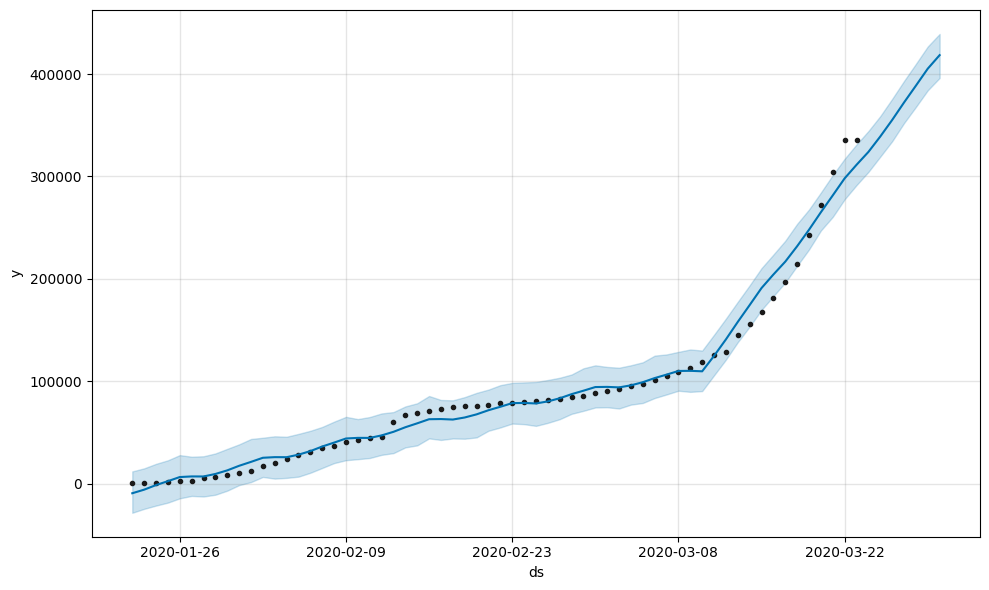

In [49]:
confirmed_forecast_plot = m.plot(forecast)

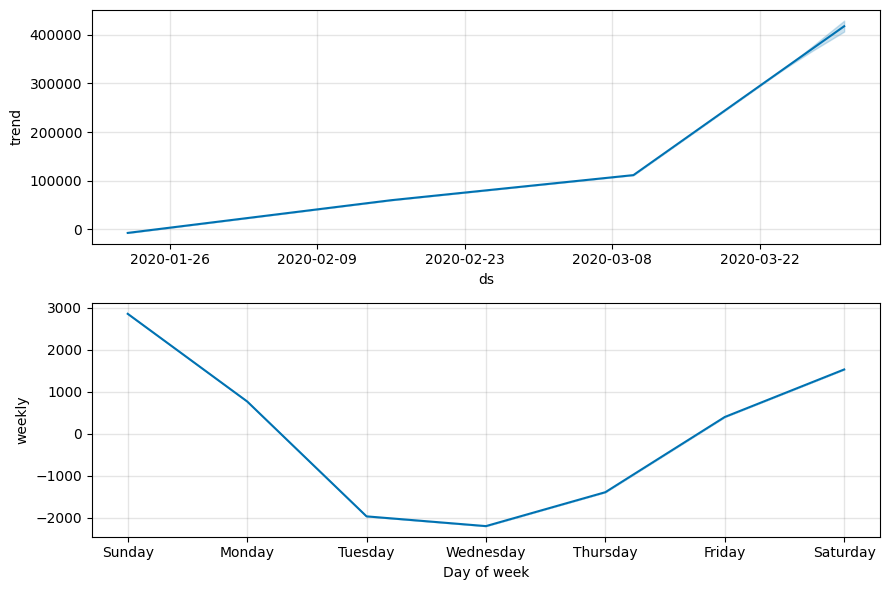

In [50]:
confirmed_forecast_plot = m.plot_components(forecast)

In [51]:
#Predicting and forecasting data for number of deaths cases
deaths.columns = ['ds', 'y']
deaths['ds']= pd.to_datetime(deaths['ds'])

In [52]:
m = Prophet()
m.fit(deaths)
future=m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
64 2020-03-26
65 2020-03-27
66 2020-03-28
67 2020-03-29
68 2020-03-30

In [53]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
64 2020-03-26  15411.877522  14795.117034  16065.805856
65 2020-03-27  16199.617603  15515.179071  16847.272378
66 2020-03-28  17006.904589  16411.515978  17666.579586
67 2020-03-29  17831.505383  17148.141941  18532.632397
68 2020-03-30  18490.986176  17806.412151  19166.278702

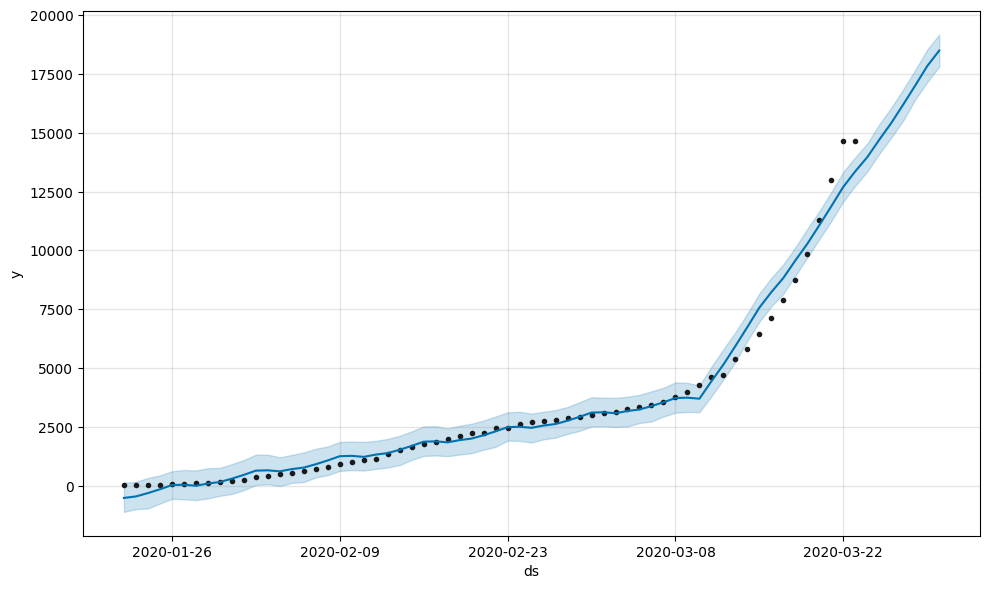

In [54]:
deaths_forecast_plot = m.plot(forecast)

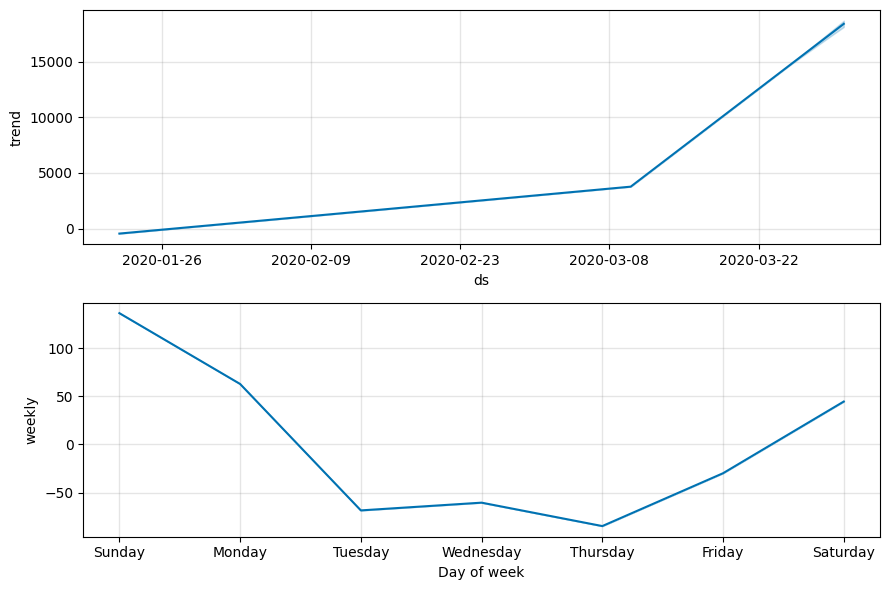

In [55]:
deaths_forecast_plot = m.plot_components(forecast)

In [56]:
#Predicting and forecasting data for number of recovered cases
recovered.columns = ['ds', 'y']
recovered['ds']= pd.to_datetime(recovered['ds'])

In [57]:
m = Prophet()
m.fit(recovered)
future=m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
64 2020-03-26
65 2020-03-27
66 2020-03-28
67 2020-03-29
68 2020-03-30

In [58]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
64 2020-03-26  103001.351030  101915.554468  104110.399803
65 2020-03-27  105338.024177  103996.964001  106598.827771
66 2020-03-28  108256.309828  106997.834924  109690.250325
67 2020-03-29  111119.295023  109622.069127  112539.276690
68 2020-03-30  113244.960489  111441.391626  114890.188774

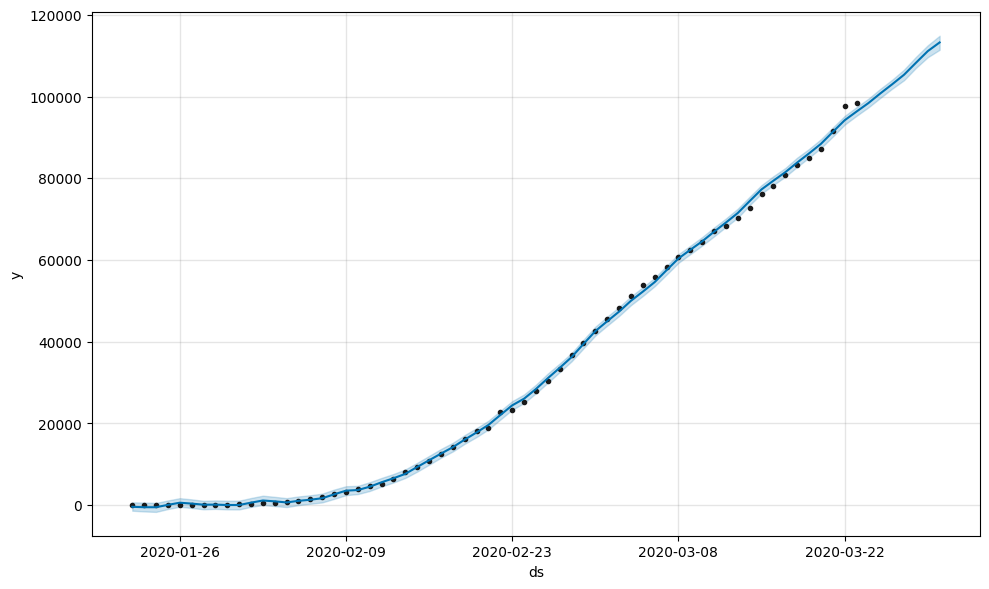

In [59]:
recovered_forecast_plot = m.plot(forecast)

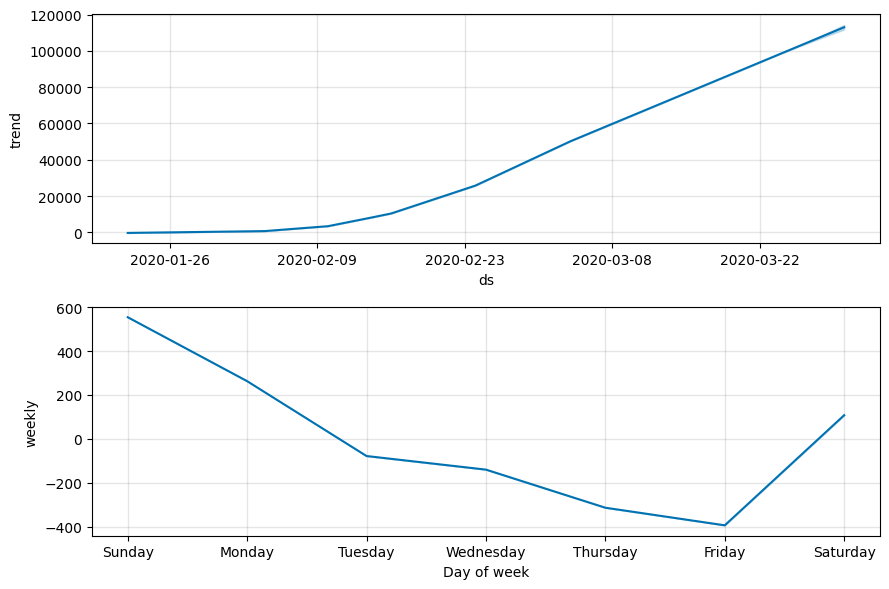

In [60]:
recovered_forecast_plot = m.plot_components(forecast)

In [63]:
india_confirmed.columns = ['ds', 'y']
india_confirmed['ds']= pd.to_datetime(india_confirmed['ds'])

In [64]:
#Predicting and forecasting data for number of confimed cases in India
m = Prophet()
m.fit(india_confirmed)
future=m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
64 2020-03-26
65 2020-03-27
66 2020-03-28
67 2020-03-29
68 2020-03-30

In [65]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
64 2020-03-26  153.433237   69.791504  235.296098
65 2020-03-27  160.140437   69.815260  245.389883
66 2020-03-28  172.292065   88.466902  257.171116
67 2020-03-29  181.553191   99.615806  268.605575
68 2020-03-30  183.035658  101.267164  269.675513

In [66]:
india_confirmed_plot = m.plot(forecast)

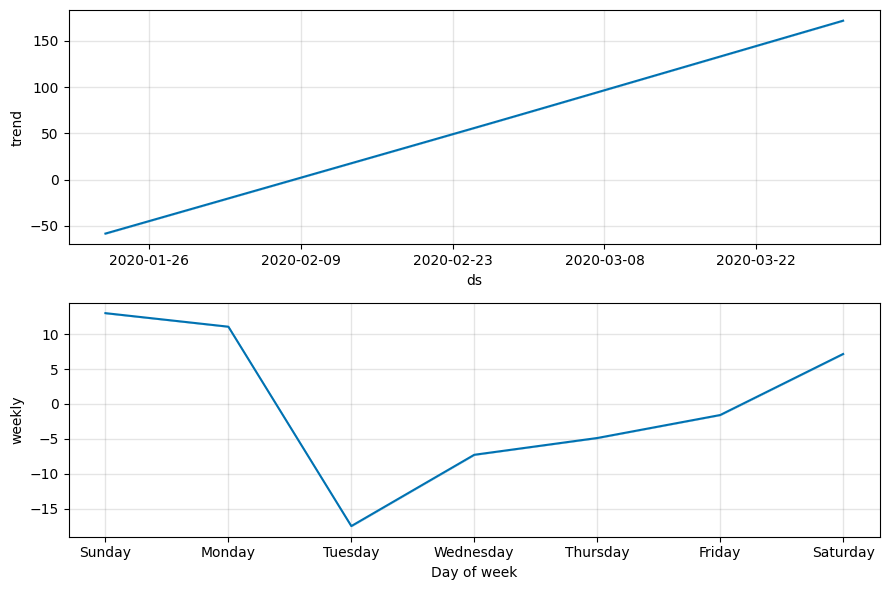

In [67]:
india_confirmed_plot = m.plot_components(forecast)

In [68]:
#Predicting and forecasting data for number of death cases in India

india_deaths.columns = ['ds', 'y']
india_deaths['ds']= pd.to_datetime(india_deaths['ds'])

In [69]:
m = Prophet()
m.fit(india_deaths)
future=m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
64 2020-03-26
65 2020-03-27
66 2020-03-28
67 2020-03-29
68 2020-03-30

In [70]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
64 2020-03-26  2.561546    1.071141    4.170057
65 2020-03-27  2.784182    1.154907    4.434041
66 2020-03-28  2.673488    1.171034    4.284819
67 2020-03-29  3.007224    1.468946    4.595740
68 2020-03-30  3.007627    1.357895    4.591305

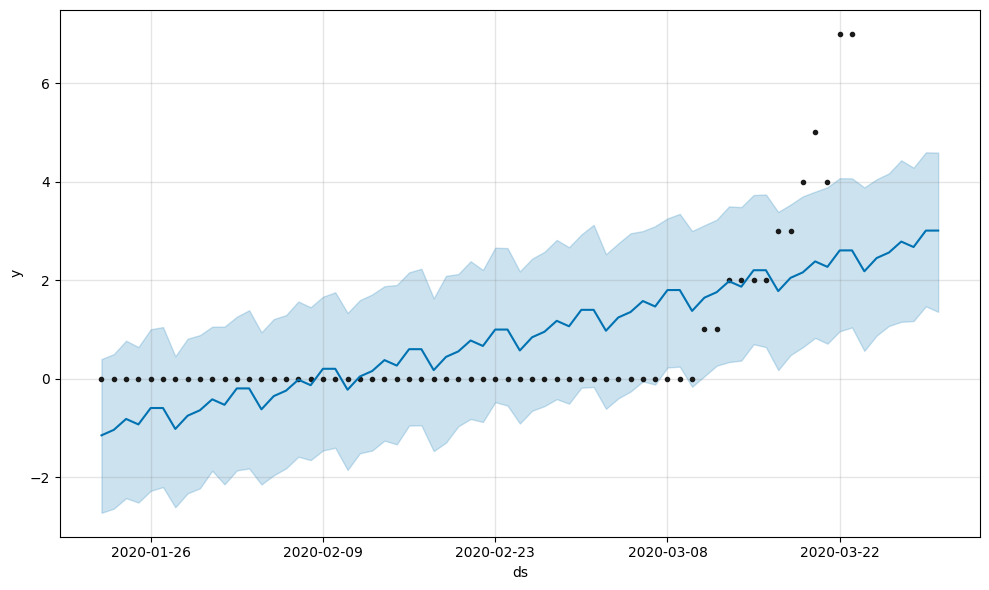

In [71]:
india_deaths_plot = m.plot(forecast)

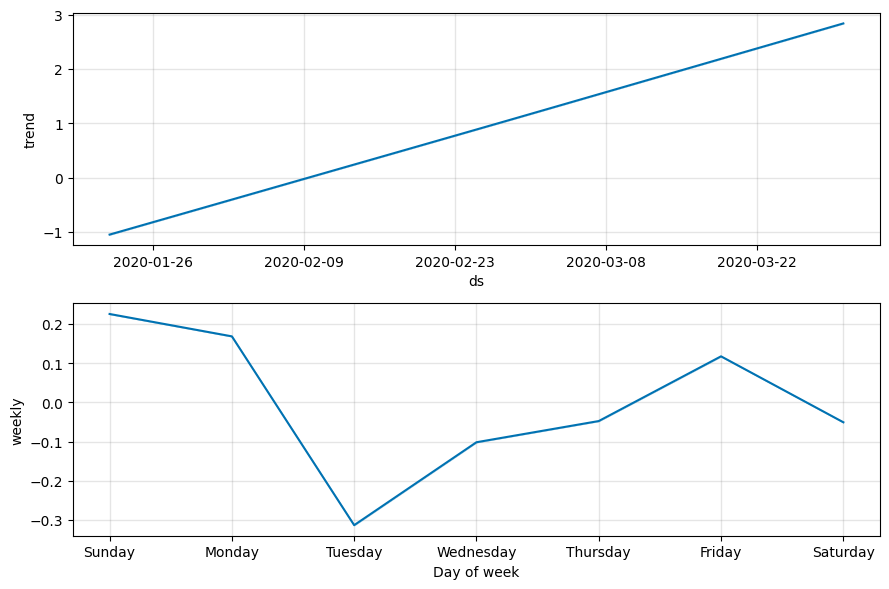

In [72]:
india_deaths_plot = m.plot_components(forecast)

In [73]:
#Predicting and forecasting data for number of recovered cases in India
india_recovered.columns = ['ds', 'y']
india_recovered['ds']= pd.to_datetime(india_recovered['ds'])

In [74]:
m = Prophet()
m.fit(india_recovered)
future=m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
64 2020-03-26
65 2020-03-27
66 2020-03-28
67 2020-03-29
68 2020-03-30

In [75]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
64 2020-03-26  12.347317    7.133187   18.044285
65 2020-03-27  12.904069    7.177575   18.372424
66 2020-03-28  13.238538    8.110721   19.160788
67 2020-03-29  15.017417    9.489461   20.646886
68 2020-03-30  15.018436    9.312856   19.898825

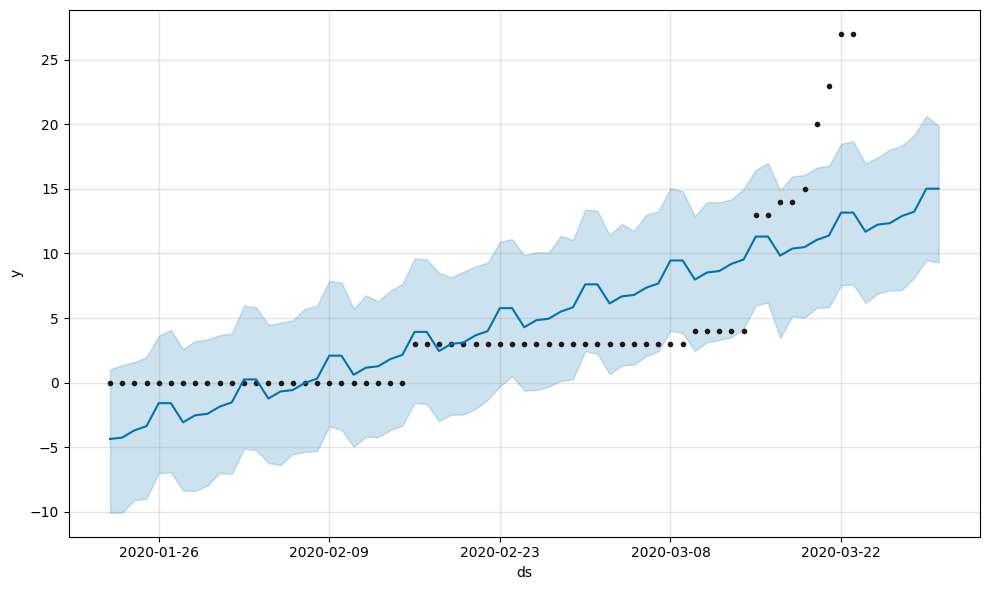

In [76]:
india_recovered_plot = m.plot(forecast)

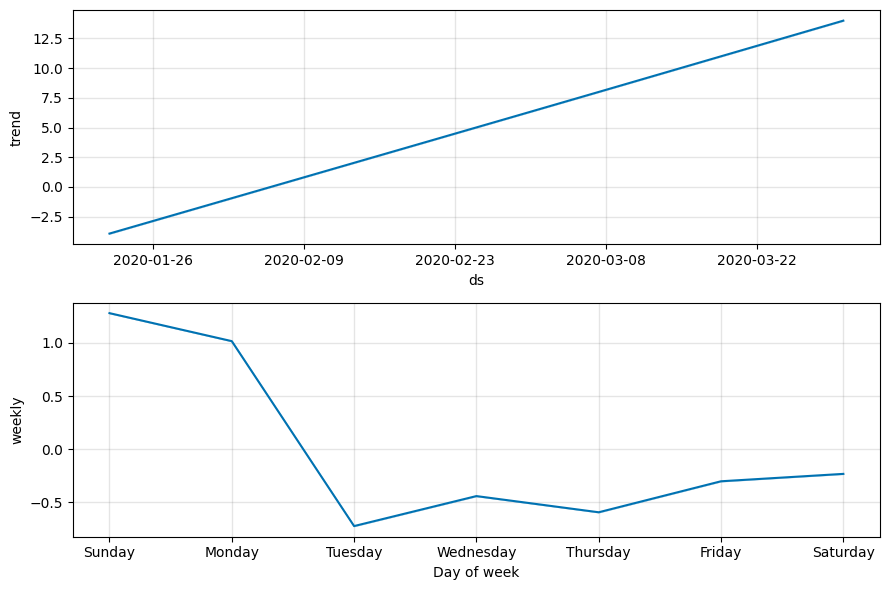

In [77]:
india_recovered_plot = m.plot_components(forecast)